In [65]:
import html
import sys, json
import pandas as pd
import numpy as np
from pathlib import Path
import pyarrow.dataset as ds
from IPython.core.display import HTML
from IPython.display import display, Markdown
from pandas.api.types import is_string_dtype, is_object_dtype

import matplotlib.pyplot as plt
import matplotlib as mpl

try:
    from src.config import PROCESSED_DIR, POSTER_DIR
except ModuleNotFoundError:
    sys.path.insert(0, str(Path.cwd() / "src"))
    from src.config import PROCESSED_DIR, POSTER_DIR


In [12]:
PARQ_DIR = Path(PROCESSED_DIR) / "movies_parquet"
PARQ_FILE = Path(PROCESSED_DIR) / "movies.parquet"
SRC = PARQ_DIR if PARQ_DIR.exists() and any(PARQ_DIR.rglob("*.parquet")) else PARQ_FILE


In [69]:
def note(md: str):
    display(Markdown(md.strip()))

In [16]:
def read_parquet(path: Path, columns = None) -> pd.DataFrame:
     """Reads a partitioned Parquet dir or single file with pandas; falls back to PyArrow Dataset if needed."""
     try:
         return pd.read_parquet(path, columns=columns)
     except Exception:
         if path.is_dir():
             table = ds.dataset(path, format="parquet", partitioning="hive").to_table(columns=columns)
             return table.to_pandas()
         return pd.read_parquet(path, columns=columns)


In [17]:
df = read_parquet(SRC)
df.head(8)

,adult,backdrop_path,genre_ids,movie_id,original_language,original_title,overview,popularity,poster_path,release_date,...,runtime,actors,directors,genre_ids_json,actors_json,directors_json,poster_url,backdrop_url,has_poster,year
0,False,<NA>,[],1000228,ja,Natsuko,Natsuko lives with her husband in the countrys...,0.0782,/n5P5dEwfSF3CWxslKedBWRFHK7h.jpg,2020-01-01,...,16.0,None,Shuna Iijima,[],[],"[""Shuna Iijima""]",https://image.tmdb.org/t/p/w500/n5P5dEwfSF3CWx...,https://image.tmdb.org/t/p/w500<NA>,True,2020
1,False,<NA>,[10749],1000284,ko,맨살에 생크림 맛있게 빠는 처제,<NA>,0.0379,/ueXfFaAxjz2EzvgQkOGl067eunF.jpg,2020-01-01,...,0.0,None,None,[10749],[],[],https://image.tmdb.org/t/p/w500/ueXfFaAxjz2Ezv...,https://image.tmdb.org/t/p/w500<NA>,True,2020
2,False,<NA>,[10749],1000288,ko,아랫도리 살살 문지르는 20대 섹스 파트너,<NA>,0.4291,/jyZ8Ag26ggz7kd9vgqr7WmJKUmQ.jpg,2020-01-01,...,0.0,None,None,[10749],[],[],https://image.tmdb.org/t/p/w500/jyZ8Ag26ggz7kd...,https://image.tmdb.org/t/p/w500<NA>,True,2020
3,False,<NA>,[99],1001551,en,My Grandfather's Skin,Some of the repressed stories of my ancestors ...,0.0261,/9BdRVncMgZTpAsVcihUjz3eftjJ.jpg,2020-01-01,...,5.0,Yana Bachynska,Yana Bachynska,[99],"[""Yana Bachynska""]","[""Yana Bachynska""]",https://image.tmdb.org/t/p/w500/9BdRVncMgZTpAs...,https://image.tmdb.org/t/p/w500<NA>,True,2020
4,False,<NA>,[],1003594,en,Tengefu,<NA>,0.0143,<NA>,2020-01-01,...,0.0,None,Jessey Dearing,[],[],"[""Jessey Dearing""]",https://image.tmdb.org/t/p/w500<NA>,https://image.tmdb.org/t/p/w500<NA>,True,2020
5,False,<NA>,[],1003635,de,PAC 9000,<NA>,0.0261,<NA>,2020-01-01,...,7.0,None,Minu Park,[],[],"[""Minu Park""]",https://image.tmdb.org/t/p/w500<NA>,https://image.tmdb.org/t/p/w500<NA>,True,2020
6,False,<NA>,[],1003636,de,Yksi Kaksi Kolme,<NA>,0.0806,<NA>,2020-01-01,...,0.0,None,Dagie Brundert,[],[],"[""Dagie Brundert""]",https://image.tmdb.org/t/p/w500<NA>,https://image.tmdb.org/t/p/w500<NA>,True,2020
7,False,<NA>,[],1003950,pt,VIOLÃOZIN? NÃO!!,<NA>,0.0143,<NA>,2020-01-01,...,0.0,None,Juliana Tillmann,[],[],"[""Juliana Tillmann""]",https://image.tmdb.org/t/p/w500<NA>,https://image.tmdb.org/t/p/w500<NA>,True,2020


In [18]:
df.columns

Index(['adult', 'backdrop_path', 'genre_ids', 'movie_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'runtime', 'actors', 'directors', 'genre_ids_json', 'actors_json',
       'directors_json', 'poster_url', 'backdrop_url', 'has_poster', 'year'],
      dtype='object')

In [20]:
print("shape:", df.shape)
display(df.dtypes)

shape: (236964, 24)


adult                          bool
backdrop_path        string[python]
genre_ids                    object
movie_id             string[python]
original_language    string[python]
original_title       string[python]
overview             string[python]
popularity                  float64
poster_path          string[python]
release_date                 object
title                string[python]
video                          bool
vote_average                float64
vote_count                    Int64
runtime                     float64
actors                       object
directors                    object
genre_ids_json       string[python]
actors_json          string[python]
directors_json       string[python]
poster_url                   object
backdrop_url                 object
has_poster                     bool
year                          Int64
dtype: object

In [23]:
key_cols = [c for c in [
    "title","overview","release_date","runtime","poster_url",
    "genre_ids_json","actors_json","directors_json"
] if c in df.columns]

def null_count(s: pd.Series) -> int:
    if is_string_dtype(s) or is_object_dtype(s):
        return int(s.isna().sum() + s.astype("string").str.strip().eq("").sum())
    return int(s.isna().sum())

In [24]:
null_value_count = {c: null_count(df[c]) for c in key_cols}
pd.DataFrame.from_dict(null_value_count, orient="index", columns =["null_or_blank"]).sort_values("null_or_blank", ascending=False)

,null_or_blank
overview,35911
runtime,9
title,1
release_date,1
poster_url,0
genre_ids_json,0
actors_json,0
directors_json,0


In [92]:
miss = {c:int(df[c].isna().sum()) for c in ["overview","runtime","actors_json","directors_json","poster_url"] if c in df}
note("**Data quality — Missing values**  \n" +
     " • ".join([f"{k}: {v}" for k,v in miss.items()]) +
     "\n- Fill text with empty strings; drop/flag rows missing essential fields for specific features.")


**Data quality — Missing values**  
overview: 35911 • runtime: 9 • actors_json: 0 • directors_json: 0 • poster_url: 0
- Fill text with empty strings; drop/flag rows missing essential fields for specific features.

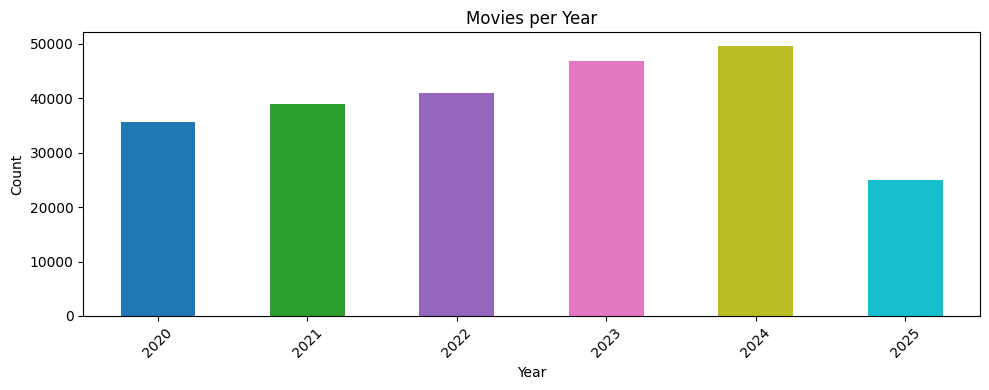

**Takeaways — Year trend**
- Coverage: **236,963** titles from **2020–2025**; peak in **2024** (49,614 titles).
- Recent years dominate → good for *modern preference learning*; watch for drift across years when evaluating.
- If earlier years are thin, avoid temporal leakage (do time-based split).

In [91]:
# Year counts
if "year" in df:
    years = pd.to_numeric(df["year"], errors="coerce").dropna().astype("int")
    year_counts = years.value_counts().sort_index()
    cmap = mpl.colormaps.get_cmap("tab10")
    colors = cmap(np.linspace(0, 1, len(year_counts)))
    ax = year_counts.plot(kind="bar", color=colors, figsize=(10, 4))
    ax.set_title("Movies per Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()

    total = int(year_counts.sum())
    first_year, last_year = int(year_counts.index.min()), int(year_counts.index.max())
    peak_year = int(year_counts.idxmax())
    peak_n = int(year_counts.max())

    note(f"""
**Takeaways — Year trend**
- Coverage: **{total:,}** titles from **{first_year}–{last_year}**; peak in **{peak_year}** ({peak_n:,} titles).
- Recent years dominate → good for *modern preference learning*; watch for drift across years when evaluating.
- If earlier years are thin, avoid temporal leakage (do time-based split).
""")



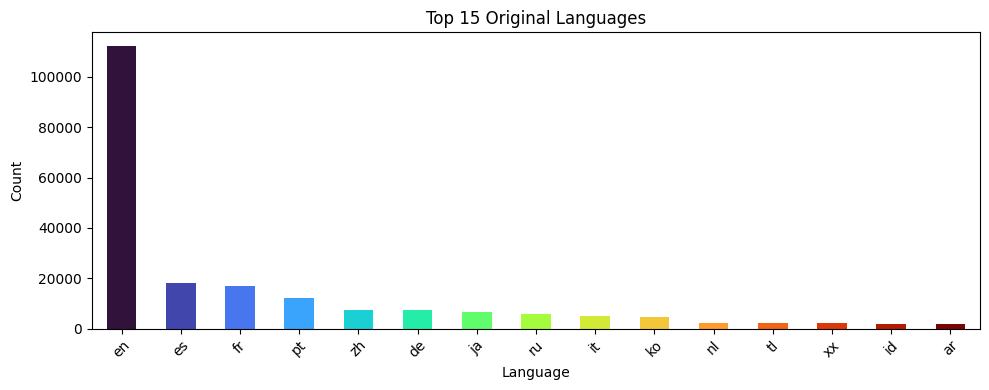

In [49]:
if "original_language" in df:
    lang_counts = df["original_language"].value_counts().head(15)
    cmap = mpl.colormaps.get_cmap("turbo")
    colors = cmap(np.linspace(0, 1, len(lang_counts)))
    ax = lang_counts.plot(kind="bar", color=colors, figsize=(10, 4))
    ax.set_title("Top 15 Original Languages")
    ax.set_xlabel("Language")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()


In [86]:
top_langs = df["original_language"].value_counts().head(3).to_dict()
note("**Takeaways — Language mix**  \n"
     + " • ".join([f"{k}: {v}" for k,v in top_langs.items()]) +
     "\n- Consider language as a feature; also filter by user locale at inference.")

**Takeaways — Language mix**  
en: 112133 • es: 18085 • fr: 16799
- Consider language as a feature; also filter by user locale at inference.

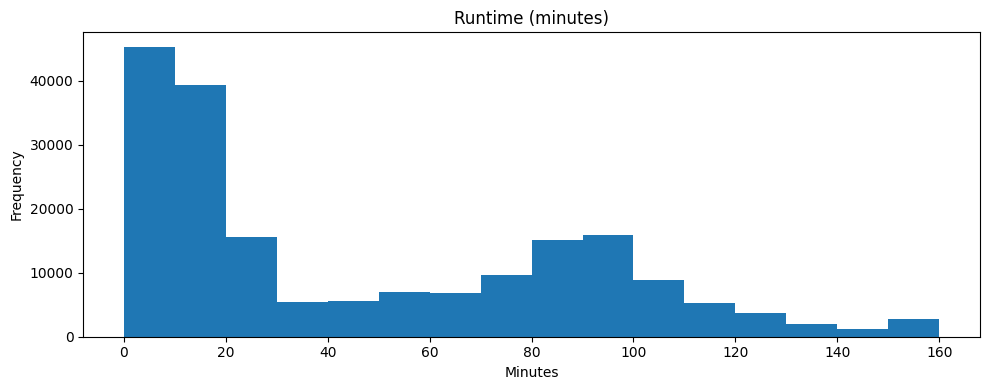

{'p05': 3.0, 'p50': 25.0, 'p95': 120.0, 'neg_or_zero': 47386}


**Takeaways — Runtime**
- Typical runtime: median **25 min** (5–95% ≈ **3–120**).
- Outliers exist; cap at ~**120** in modeling features to reduce skew.
- Data quality: **47386** non-positive runtimes → set to NaN or drop for duration-based features.

In [90]:
if "runtime" in df:
    s = pd.to_numeric(df["runtime"], errors="coerce")
    s = s[s > 0].dropna()

    # Trim extreme outliers so bins are sensible
    lo, hi = s.quantile([0.01, 0.99])
    s_clip = s.clip(lower=lo, upper=hi)

    # Choose bins (nice 10-min bins up to max)
    max_min = int(np.ceil(s_clip.max() / 10.0) * 10)
    bins = np.arange(0, max(60, max_min) + 10, 10)

    ax = s_clip.plot(kind="hist", bins=bins, color="tab:blue", figsize=(10, 4))
    ax.set_title("Runtime (minutes)")
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Frequency")
    plt.tight_layout(); plt.show()

    # Stats
    p = {
        "p05": float(s.quantile(0.05)),
        "p50": float(s.quantile(0.50)),
        "p95": float(s.quantile(0.95)),
        "neg_or_zero": int((pd.to_numeric(df["runtime"], errors="coerce") <= 0).fillna(False).sum()),
    }
    print(p)

    p05, p50, p95 = p["p05"], p["p50"], p["p95"]
    bad = p["neg_or_zero"]

    note(f"""
**Takeaways — Runtime**
- Typical runtime: median **{p50:.0f} min** (5–95% ≈ **{p05:.0f}–{p95:.0f}**).
- Outliers exist; cap at ~**{p95:.0f}** in modeling features to reduce skew.
- Data quality: **{bad}** non-positive runtimes → set to NaN or drop for duration-based features.
""")

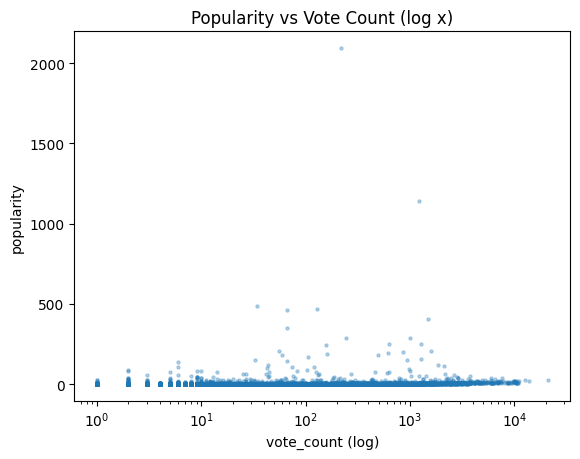

**Takeaways — Popularity vs Votes**
- Strong popularity skew; long tail of low-vote titles.
- For training, avoid pure `popularity` targets to reduce popularity bias; combine with text/credits embeddings.

In [88]:
if {"popularity", "vote_count"}.issubset(df.columns):
    # clip extremes for legibility
    sub = df[["popularity","vote_count"]].dropna().copy()
    sub["vote_count"] = sub["vote_count"].clip(lower=0)
    plt.figure()
    plt.scatter(sub["vote_count"], sub["popularity"], s=5, alpha=0.3)
    plt.xscale("log");  # vote_count often very skewed
    plt.title("Popularity vs Vote Count (log x)")
    plt.xlabel("vote_count (log)"); plt.ylabel("popularity")
    plt.show()

    note("""
**Takeaways — Popularity vs Votes**
- Strong popularity skew; long tail of low-vote titles.
- For training, avoid pure `popularity` targets to reduce popularity bias; combine with text/credits embeddings.
""")

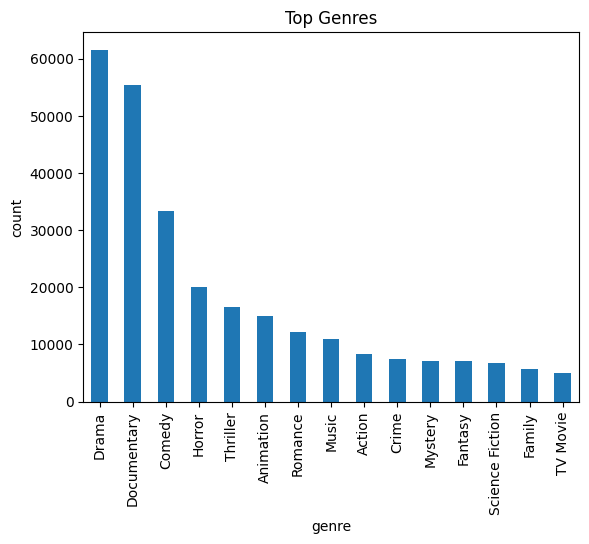

**Takeaways — Genre mix**
- A few genres dominate (Action/Drama/etc.). This helps collaborative signals but can bias popular genres.
- Use multi-hot or embedding of `genre_ids_json`; consider class weighting when evaluating per-genre quality.

In [89]:
# TMDb genre ID map (standard)
GENRE_MAP = {
    28:"Action",12:"Adventure",16:"Animation",35:"Comedy",80:"Crime",99:"Documentary",
    18:"Drama",10751:"Family",14:"Fantasy",36:"History",27:"Horror",10402:"Music",
    9648:"Mystery",10749:"Romance",878:"Science Fiction",10770:"TV Movie",53:"Thriller",
    10752:"War",37:"Western"
}

def parse_id_list(s):
    if pd.isna(s): return []
    if isinstance(s, list): return [int(x) for x in s if str(x).isdigit()]
    try:
        j = json.loads(str(s))
        return [int(x) for x in j if str(x).isdigit() or isinstance(x,int)]
    except Exception:
        return []

if "genre_ids_json" in df:
    g = df["genre_ids_json"].apply(parse_id_list)
    # explode
    tmp = pd.DataFrame({"genre_id": [gid for lst in g for gid in lst]})
    tmp["genre"] = tmp["genre_id"].map(GENRE_MAP).fillna(tmp["genre_id"].astype(str))
    top_genres = tmp["genre"].value_counts().head(15)
    plt.figure()
    top_genres.plot(kind="bar")
    plt.title("Top Genres")
    plt.xlabel("genre"); plt.ylabel("count")
    plt.show()
    top_genres.head(10)

    note("""
**Takeaways — Genre mix**
- A few genres dominate (Action/Drama/etc.). This helps collaborative signals but can bias popular genres.
- Use multi-hot or embedding of `genre_ids_json`; consider class weighting when evaluating per-genre quality.
""")


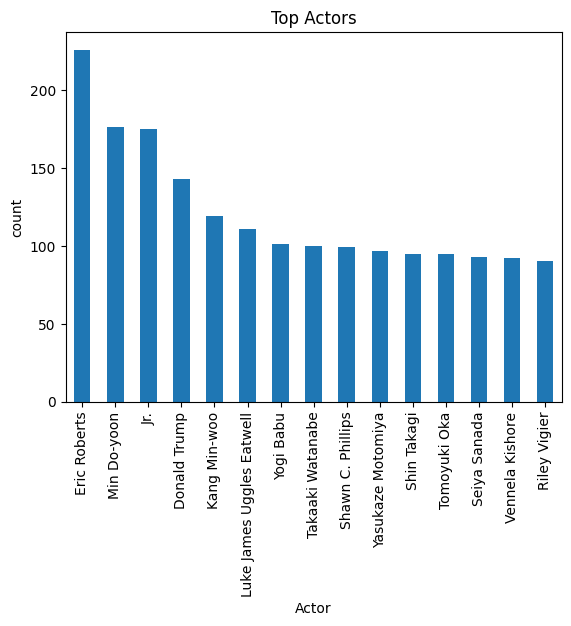

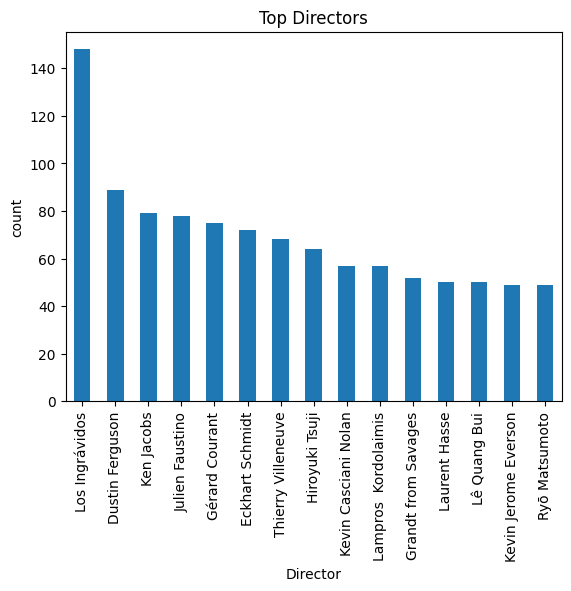

{'actors_json':                            count
 Eric Roberts                 226
 Min Do-yoon                  176
 Jr.                          175
 Donald Trump                 143
 Kang Min-woo                 119
 Luke James Uggles Eatwell    111
 Yogi Babu                    101
 Takaaki Watanabe             100
 Shawn C. Phillips             99
 Yasukaze Motomiya             97
 Shin Takagi                   95
 Tomoyuki Oka                  95
 Seiya Sanada                  93
 Vennela Kishore               92
 Riley Vigier                  90,
 'directors_json':                       count
 Los Ingrávidos          148
 Dustin Ferguson          89
 Ken Jacobs               79
 Julien Faustino          78
 Gérard Courant           75
 Eckhart Schmidt          72
 Thierry Villeneuve       68
 Hiroyuki Tsuji           64
 Kevin Casciani Nolan     57
 Lampros  Kordolaimis     57
 Grandt from Savages      52
 Laurent Hasse            50
 Lê Quang Bui             50
 Kevin Jerome Ev

In [54]:
def parse_name_list(s):
    if pd.isna(s): return []
    if isinstance(s, list): return [str(x).strip() for x in s if str(x).strip()]
    try:
        j = json.loads(str(s))
        return [str(x).strip() for x in j if str(x).strip()]
    except Exception:
        # fallback: split on commas
        return [t.strip() for t in str(s).split(",") if t.strip()]

tops = {}
for col in ["actors_json","directors_json"]:
    if col in df:
        lst = [name for row in df[col].apply(parse_name_list) for name in row]
        vc = pd.Series(lst).value_counts().head(15)
        tops[col] = vc
        plt.figure()
        vc.plot(kind="bar")
        ttl = "Actors" if col.startswith("actors") else "Directors"
        plt.title(f"Top {ttl}")
        plt.xlabel(ttl[:-1]); plt.ylabel("count")
        plt.show()

# tables
{ k: v.to_frame("count") for k,v in tops.items() }


In [60]:
def show_posters(df: pd.DataFrame, how="popular", n=4, seed=42):
    d = df.dropna(subset=["poster_url", "title"]).copy()
    if d.empty:
        return display(HTML("<b>No posters available.</b>"))
    if how == "popular" and "popularity" in d.columns:
        d = d.sort_values("popularity", ascending=False).head(50)
    else:
        d = d.sample(min(50, len(d)), random_state=seed)

    pick = d.sample(min(n, len(d)), random_state=seed + 1)[["title", "poster_url"]]

    html_parts = ["<div style='display:flex;gap:16px;flex-wrap:wrap;'>"]
    for _, r in pick.iterrows():
        title = html.escape(str(r["title"]))
        url = str(r["poster_url"])
        html_parts.append(f"""
                <div style="width:220px;">
                <img src="{url}" style="width:220px;height:auto;display:block;border-radius:8px;"/>
                <div style="font-size:14px;margin-top:6px;">{title}</div>
                </div>""")
    html_parts.append("</div>")
    display(HTML("\n".join(html_parts)))



In [64]:
# usage
show_posters(df, how="popular", n=4)